In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.model_selection import KFold

import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib  inline

In [2]:
train =  pd.read_csv('trainofbike.csv',  parse_dates = ['datetime'])
test = pd.read_csv('testofbike.csv', parse_dates = ['datetime'])

In [3]:
#datetimeの変換
import datetime as dt
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['weekday'] = train.datetime.dt.weekday
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['weekday'] = test.datetime.dt.weekday
test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month

In [4]:
train_0 = train.drop(columns = ['datetime', 'casual', 'registered', 'count'])
train_y = train['count']
test_0 = test.drop(columns = ['datetime'])
test_datetime = test['datetime']

In [5]:
train_y = train['count']
train_y_log = np.log1p(train_y)

In [10]:
train

array([    0,     1,     2, ..., 10883, 10884, 10885])

In [6]:
# ENet 可視化(count log用)
alphas = 10**np.linspace(-5, 10, 500)

Elastic_cv = ElasticNetCV(alphas=alphas, cv=10)
Elastic_cv.fit(train_0, train_y_log)
print(Elastic_cv.alpha_)

kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_y_log)
kf_ = list(kf)

cnt = 0
sum = 0
diff = []
for train, test in kf_:
    cnt += 1
    from sklearn.linear_model import ElasticNet,ElasticNetCV
    Elastic = ElasticNet(alpha=Elastic_cv.alpha_)
    Elastic.fit(train_0.loc[train], train_y_log.loc[train])
    Elastic_train_y_pred_log = Elastic.predict(train_0.loc[test])
    y_pred = np.exp(Elastic_train_y_pred_log)-1
    y_pred[y_pred < 0] = 0
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_y.loc[test], y_pred)))
    score = np.sqrt(mean_squared_log_error(train_y.loc[test], y_pred))
    sum += score
    y_true = train_y.loc[test]
    print(y_true.sum() - y_pred.sum())
    plus = len(y_pred[y_pred > y_true])
    equal = len(y_pred[y_pred == y_true])
    minus = len(y_pred[y_pred < y_true])
    count = [plus, equal, minus]
    diff.append(count)

mean_score = sum / 10
print(f"mean_score_RMSLE = {mean_score}")

0.00882859884149515
Fold:1
RMSLE: 1.0160189176419765
47880.57375115348
Fold:2
RMSLE: 1.0293757835205843
43748.91694805966
Fold:3
RMSLE: 0.987149331385141
43501.1009150178
Fold:4
RMSLE: 1.0668019244342806
48174.39483772061
Fold:5
RMSLE: 1.0273473575212895
30145.148435543204
Fold:6
RMSLE: 0.9966239327889729
45833.73201155785
Fold:7
RMSLE: 1.0177258515287695
44511.49770633853
Fold:8
RMSLE: 1.009753311125182
45146.92933803986
Fold:9
RMSLE: 0.9952930642044492
46661.96817506268
Fold:10
RMSLE: 1.0215920211058227
36927.84177150694
mean_score_RMSLE = 1.016768149525647


In [8]:
diff
#plus, equal, minus

[[490, 0, 599],
 [493, 0, 596],
 [487, 0, 602],
 [523, 0, 566],
 [526, 0, 563],
 [484, 0, 605],
 [488, 0, 600],
 [459, 0, 629],
 [477, 0, 611],
 [530, 0, 558]]

In [9]:
y_pred.sum() - y_true.sum()

-36927.84177150694

0.00882859884149515
Fold:1
RMSLE: 1.0160189176419765
Fold:2
RMSLE: 1.0293757835205843
Fold:3
RMSLE: 0.987149331385141
Fold:4
RMSLE: 1.0668019244342806
Fold:5
RMSLE: 1.0273473575212895
Fold:6
RMSLE: 0.9966239327889729
Fold:7
RMSLE: 1.0177258515287695
Fold:8
RMSLE: 1.009753311125182
Fold:9
RMSLE: 0.9952930642044492
Fold:10
RMSLE: 1.0215920211058227
mean_score_RMSLE = 1.016768149525647


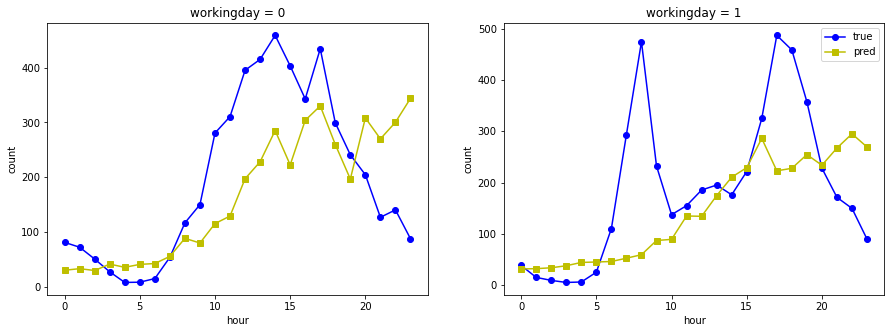

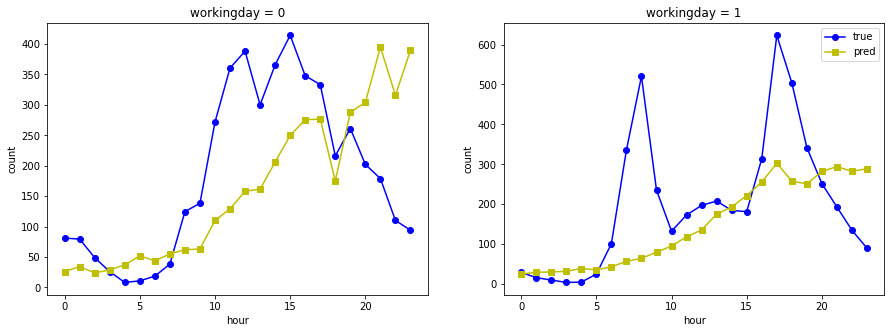

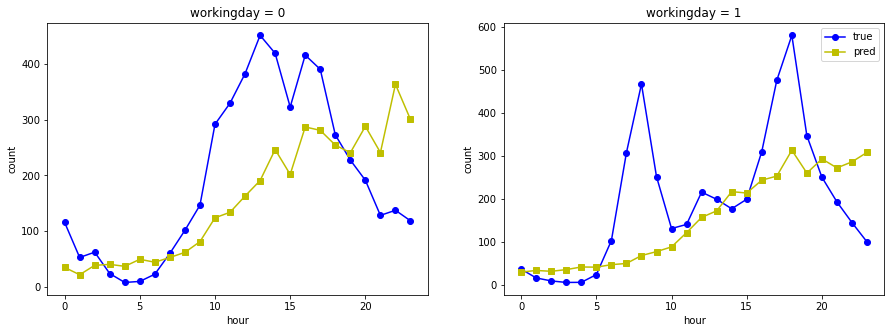

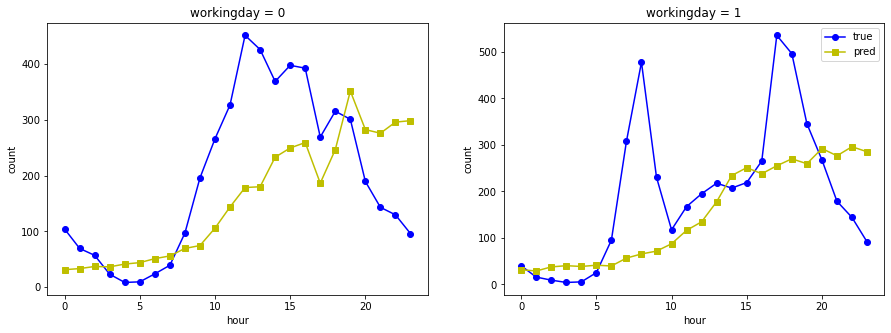

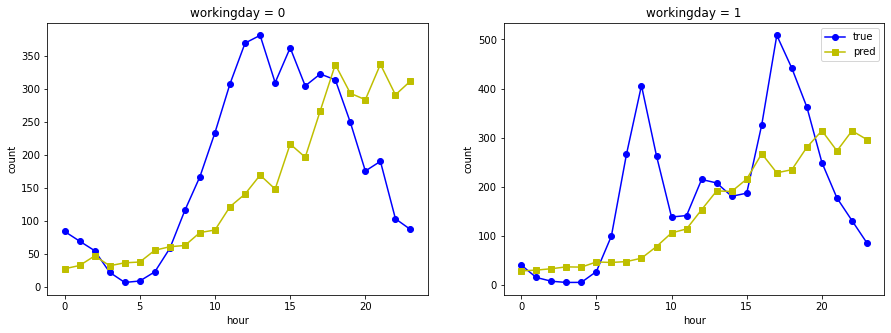

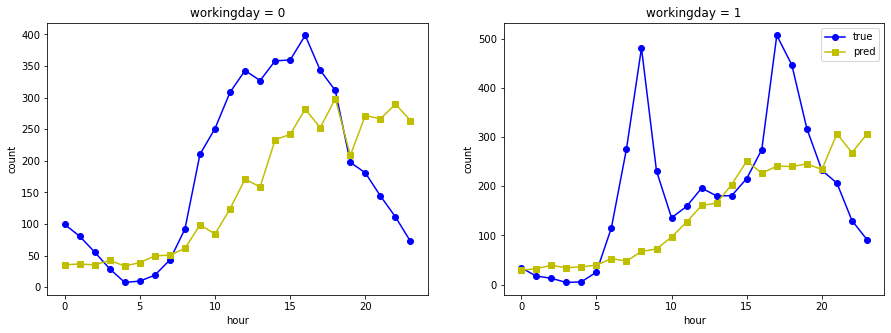

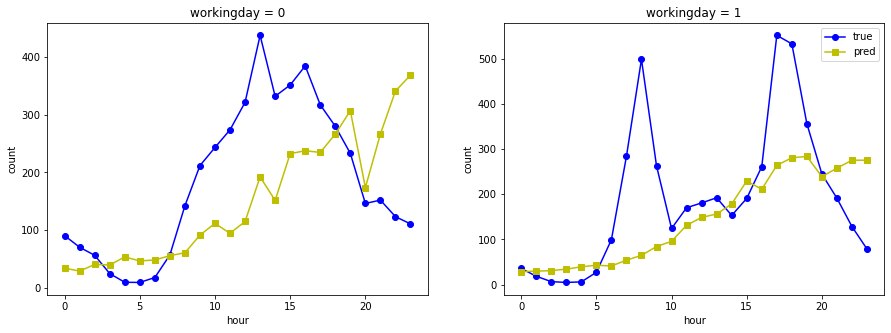

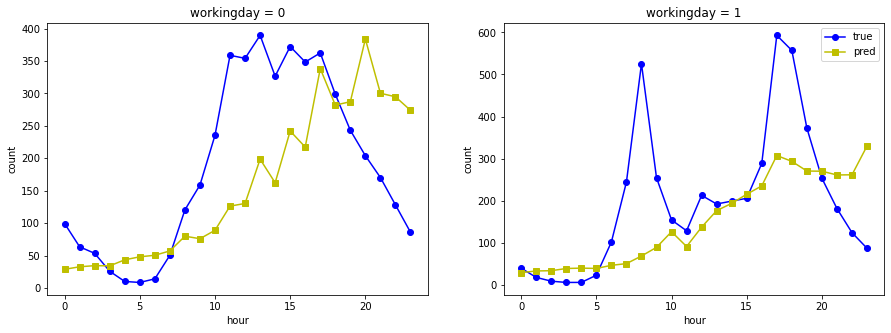

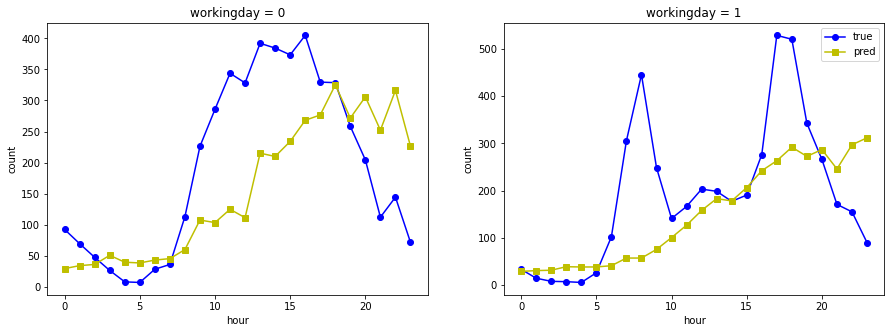

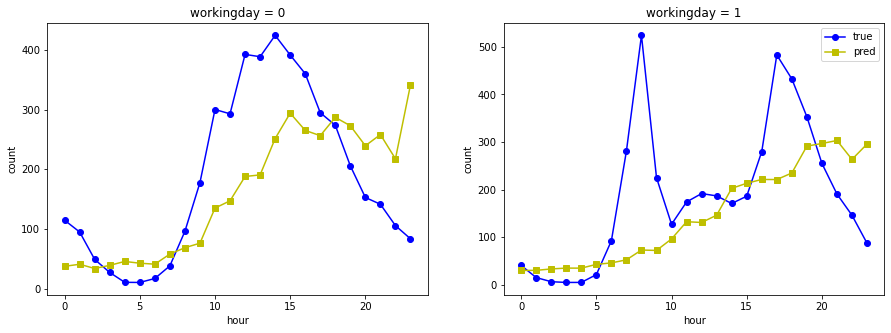

In [6]:
#１０分割の交差検証。それぞれで時間ごとの平均をとり、グラフにしてみる
alphas = 10**np.linspace(-5, 10, 500)

Elastic_cv = ElasticNetCV(alphas=alphas, cv=10)
Elastic_cv.fit(train_0, train_y_log)
print(Elastic_cv.alpha_)

kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_y_log)
kf_ = list(kf)

cnt = 0
sum = 0
diff = []
for trainfold, testfold in kf_:
  #ここから学習と予測
    cnt += 1
    from sklearn.linear_model import ElasticNet,ElasticNetCV
    Elastic = ElasticNet(alpha=Elastic_cv.alpha_)
    Elastic.fit(train_0.loc[trainfold], train_y_log.loc[trainfold])
    Elastic_train_y_pred_log = Elastic.predict(train_0.loc[testfold])
    y_pred = np.exp(Elastic_train_y_pred_log)-1
    y_pred[y_pred < 0] = 0
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_y.loc[testfold], y_pred)))
    score = np.sqrt(mean_squared_log_error(train_y.loc[testfold], y_pred))
    sum += score
    y_true = train_y.loc[testfold]
    plus = len(y_pred[y_pred > y_true])
    equal = len(y_pred[y_pred == y_true])
    minus = len(y_pred[y_pred < y_true])
    count = [plus, equal, minus]
    diff.append(count)
    #ここからグラフの制作
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(121)
    ax_ = fig.add_subplot(122)
    #検証用データ（実際の値）と予測値について時間ごと平均をとっている
    count_hour_true = pd.DataFrame(train.loc[testfold].groupby(["hour","workingday"],sort=True)["count"].mean()).reset_index()
    preds = pd.concat([train_0.loc[testfold].reset_index(), pd.Series(y_pred, name="count_pred").reset_index()], axis=1)
    count_hour_pred = pd.DataFrame(preds.groupby(["hour", "workingday"], sort=True)["count_pred"].mean()).reset_index()
    #workingdayの値ごとに変数に代入している
    count_workingday_0_true = count_hour_true[count_hour_true["workingday"] == 0]
    count_workingday_1_true = count_hour_true[count_hour_true["workingday"] == 1]
    count_workingday_0_pred = count_hour_pred[count_hour_pred["workingday"] == 0]
    count_workingday_1_pred = count_hour_pred[count_hour_pred["workingday"] == 1]
    #グラフにプロット
    ax.plot(count_workingday_0_true["hour"], count_workingday_0_true["count"], label="true", color="b", marker="o")
    ax.plot(count_workingday_0_true["hour"], count_workingday_0_pred["count_pred"], label="pred", color="y", marker="s")
    ax.set_xlabel("hour")
    ax.set_ylabel("count")
    ax.set_title("workingday = 0")
    ax_.plot(count_workingday_1_true["hour"], count_workingday_1_true["count"], label = "true", color="b",marker="o")
    ax_.plot(count_workingday_1_pred["hour"], count_workingday_1_pred["count_pred"], label="pred", color="y", marker="s")
    ax_.set_xlabel("hour")
    ax_.set_ylabel("count")
    ax_.set_title("workingday = 1")
    plt.legend()
    
mean_score = sum / 10
print(f"mean_score_RMSLE = {mean_score}")

In [11]:
diff.

[[490, 0, 599]]